https://github.com/pytorch/examples/tree/master/mnist

# PyTorch Data Preprocess

In [1]:
import torch

from torchvision import datasets, transforms

### Data Loader 부르기

파이토치는 DataLoader를 불러 model에 넣음

In [2]:
batch_size = 32
test_batch_size = 32

In [6]:
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('dataset/', train=True, download=True, #train용 데이터를 dataset폴더를 생성해서 하위에 넣어줌
                   transform=transforms.Compose([  
                       transforms.ToTensor(),
                       transforms.Normalize(mean=(0.5,), std=(0.5,)) #data 크기 스케일링
                   ])),
    batch_size=batch_size,
    shuffle=True)

# 데이터로더를 통해 MNIST 폴더의 파일 다운받고, 그중에서 train관련파일을 train_loader로 할당
# 데이터로더 기억하기. 

In [8]:
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('dataset', train=False, #test용
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.5,), (0.5))
                   ])),
    batch_size=test_batch_size,
    shuffle=True)

# test용 관련 data를 test_loader로 할당

### 첫번재 iteration에서 나오는 데이터 확인

In [9]:
images, labels = next(iter(train_loader))

#next(iter (train_loader)) -> train_loader에 있는자료형을 각각 이미지와 label을 반환

In [13]:
print(images.shape)
print(labels.shape)

## 텐서플로우에서는 채널이 맨뒤였는데, torch에서는 채널이 배치사이즈 바로 다음으로 옴

torch.Size([32, 1, 28, 28])
torch.Size([32])


In [14]:
labels.shape

torch.Size([32])

PyTorch는 TensorFlow와 다르게 [Batch Size, Channel, Height, Width] 임을 명시해야함

### 데이터 시각화

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
images[0].shape

torch.Size([1, 28, 28])

In [18]:
torch_image = torch.squeeze(images[0]) # squeeze를 통해 갯수가 1인 dimension을 날려줌
torch_image.shape

torch.Size([28, 28])

In [20]:
image = torch_image.numpy()  ## .numpy를 통해 토치형에서 numpy형으로 변환해줌
image.shape

(28, 28)

In [22]:
label = labels[0].numpy() ## lable도 토치형에서 numpy형으로 바꿔줌


In [23]:
label.shape

()

In [24]:
label

array(2, dtype=int64)

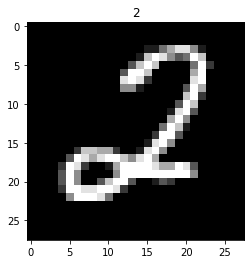

In [26]:
plt.title(label)
plt.imshow(image, 'gray')
plt.show()
# 위 예제에서는 트레인데이터의 맨처음이미지를 가져와서 맞는지확인해본것.
# 토치형파일을 그대로 넣고 plt하지 않고, numpy로 변환후 플랏한 모습